In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.0/755.0 kB 6.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [ ]:
!pip install -U torch sahi yolov8 ultralytics numpy opencv-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.1/779.1 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 74.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.2/62.2 MB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.2/176.2 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.1/168.1 MB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.8/61.8 MB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 14.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.4/953.4 kB 59.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 28.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 kB

In [ ]:
from sahi.utils.yolov8 import ( download_yolov8n_model)
from sahi import AutoDetectionModel
from sahi.utils.cv import read_image
from sahi.predict import get_prediction, get_sliced_prediction, predict, visualize_object_predictions
from IPython.display import Image
import cv2
from numpy import asarray
from ultralytics import YOLO

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Capstone_new

/content/drive/MyDrive/Capstone_new


In [ ]:
#model = YOLO('yolov8-p2.yaml')
#model = YOLO('yolov8n.pt')
model = YOLO('yolov8-p2.yaml').load('yolov8n.pt')  # build from YAML and transfer weights

WARNING ⚠️ no model scale passed. Assuming scale='n'.
WARNING ⚠️ no model scale passed. Assuming scale='n'.
Transferred 219/437 items from pretrained weights


In [ ]:
results = model.train(data='data.yaml', epochs=120, imgsz=640, augment=False, multi_scale=True)

Ultralytics YOLOv8.1.43 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8-p2.yaml, data=data.yaml, epochs=120, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train34, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True,

train: Scanning /content/drive/MyDrive/Capstone_new/Data_New_Images_3/train/labels... 1242 images, 551 backgrounds, 0 corrupt: 100%|██████████| 1242/1242 [04:51<00:00,  4.27it/s]


train: New cache created: /content/drive/MyDrive/Capstone_new/Data_New_Images_3/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 412, len(boxes) = 1077. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/MyDrive/Capstone_new/Data_New_Images_3/valid/labels... 270 images, 142 backgrounds, 0 corrupt: 100%|██████████| 270/270 [00:55<00:00,  4.86it/s]


val: New cache created: /content/drive/MyDrive/Capstone_new/Data_New_Images_3/valid/labels.cache
Plotting labels to runs/detect/train34/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001, momentum=0.9) with parameter groups 70 weight(decay=0.0), 79 weight(decay=0.0005), 78 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train34
Starting training for 120 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/120       8.9G      3.084      7.157      4.416         10        608: 100%|██████████| 78/78 [00:45<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.92it/s]

                   all        270        210   5.61e-05     0.0345   6.35e-05    1.8e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/120      8.64G      2.837      5.408      3.635          9        320: 100%|██████████| 78/78 [00:38<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.70it/s]

                   all        270        210      0.053      0.455     0.0824     0.0245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/120      8.82G      2.567      5.017      3.275         10        960: 100%|██████████| 78/78 [00:35<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.71it/s]

                   all        270        210     0.0876      0.401       0.11     0.0339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/120      9.06G      2.435      4.488      3.069         13        448: 100%|██████████| 78/78 [00:36<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.74it/s]

                   all        270        210      0.583      0.331      0.191     0.0599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/120      10.3G      2.302      4.251      2.933         13        960: 100%|██████████| 78/78 [00:36<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.06it/s]

                   all        270        210      0.196      0.511      0.278      0.122



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/120      8.59G      2.282      3.934       2.87         24        448: 100%|██████████| 78/78 [00:36<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.59it/s]

                   all        270        210      0.432      0.481      0.363      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/120      9.14G      2.213      3.562      2.794         17        736: 100%|██████████| 78/78 [00:36<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.09it/s]

                   all        270        210      0.319      0.187      0.217     0.0825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/120      9.02G      2.202      3.425      2.791         12        448: 100%|██████████| 78/78 [00:34<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.00it/s]

                   all        270        210       0.38      0.469      0.365      0.147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/120      8.58G      2.074      3.032      2.658         11        384: 100%|██████████| 78/78 [00:36<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.85it/s]

                   all        270        210      0.417      0.553      0.451       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/120      8.61G      2.097      3.048      2.714         13        960: 100%|██████████| 78/78 [00:35<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.43it/s]

                   all        270        210      0.348      0.463      0.393      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/120      8.85G      2.033      2.844      2.645         12        352: 100%|██████████| 78/78 [00:35<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.24it/s]

                   all        270        210       0.48      0.509      0.496      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/120      9.03G      2.029      2.754      2.602         12        832: 100%|██████████| 78/78 [00:35<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.86it/s]

                   all        270        210      0.469      0.576      0.502      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/120      7.76G      1.996      2.608      2.556         13        544: 100%|██████████| 78/78 [00:37<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.93it/s]

                   all        270        210      0.527      0.543        0.5      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/120      8.35G      2.004      2.635      2.569          8        640: 100%|██████████| 78/78 [00:38<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.82it/s]

                   all        270        210      0.434      0.546      0.512      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/120      8.56G      1.986      2.499      2.512         19        544: 100%|██████████| 78/78 [00:36<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.77it/s]

                   all        270        210      0.455      0.562      0.543      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/120      8.25G      2.011      2.459      2.561         20        576: 100%|██████████| 78/78 [00:36<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.20it/s]


                   all        270        210      0.503      0.501      0.498      0.209

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/120       9.6G      1.941      2.333      2.501         15        832: 100%|██████████| 78/78 [00:37<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.21it/s]

                   all        270        210      0.519      0.607      0.534      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/120       8.1G      1.942      2.397      2.482         10        608: 100%|██████████| 78/78 [00:35<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.94it/s]

                   all        270        210       0.47       0.58       0.52      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/120      8.27G      1.951      2.264      2.469         17        768: 100%|██████████| 78/78 [00:36<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.47it/s]

                   all        270        210      0.469      0.601      0.506      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/120      8.36G      1.923       2.32      2.474         11        320: 100%|██████████| 78/78 [00:35<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.86it/s]

                   all        270        210      0.468      0.554      0.538      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/120      8.66G      1.904      2.267      2.414         14        480: 100%|██████████| 78/78 [00:35<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.91it/s]

                   all        270        210      0.513      0.601      0.548      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/120      9.79G      1.888      2.167      2.438         17        768: 100%|██████████| 78/78 [00:36<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.76it/s]

                   all        270        210      0.428      0.683      0.571      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/120      8.25G      1.889      2.187      2.435          5        448: 100%|██████████| 78/78 [00:36<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.82it/s]

                   all        270        210       0.55      0.606      0.601      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/120      9.41G      1.809      2.049      2.385         16        832: 100%|██████████| 78/78 [00:39<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.83it/s]

                   all        270        210      0.448      0.539       0.51      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/120      8.84G      1.845      2.043      2.352         12        544: 100%|██████████| 78/78 [00:36<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.08it/s]


                   all        270        210      0.484      0.578      0.558      0.262

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/120      8.91G      1.858      2.125      2.391         14        448: 100%|██████████| 78/78 [00:36<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.67it/s]

                   all        270        210      0.575      0.642      0.609      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/120      9.21G      1.864      2.115      2.408          8        800: 100%|██████████| 78/78 [00:37<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.98it/s]

                   all        270        210      0.523      0.565      0.539      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/120      8.22G      1.859      2.075      2.402         14        544: 100%|██████████| 78/78 [00:38<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.69it/s]

                   all        270        210      0.504      0.638      0.619      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/120      7.92G      1.845      2.039      2.393          8        832: 100%|██████████| 78/78 [00:37<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.83it/s]

                   all        270        210      0.517      0.563      0.569      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/120      8.64G      1.828      1.982      2.366         12        704: 100%|██████████| 78/78 [00:36<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.00it/s]

                   all        270        210      0.535      0.694       0.63      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/120      9.11G      1.829      1.904      2.388         13        416: 100%|██████████| 78/78 [00:36<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.13it/s]

                   all        270        210      0.587      0.652      0.672      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/120      8.04G      1.813      1.934      2.298         14        544: 100%|██████████| 78/78 [00:37<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.20it/s]

                   all        270        210      0.719      0.558       0.66      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/120      8.92G      1.798      1.928      2.346         18        768: 100%|██████████| 78/78 [00:37<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.66it/s]

                   all        270        210       0.61      0.698      0.704      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/120      8.04G      1.803      1.919      2.306         13        448: 100%|██████████| 78/78 [00:38<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.75it/s]

                   all        270        210      0.595      0.613      0.663      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/120      9.13G      1.754      1.971      2.301         16        512: 100%|██████████| 78/78 [00:40<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.93it/s]

                   all        270        210      0.514      0.652      0.661      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/120      8.47G      1.724      1.881      2.274         18        928: 100%|██████████| 78/78 [00:38<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.92it/s]

                   all        270        210      0.614      0.714      0.701      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/120       9.3G       1.77      1.869      2.321         18        544: 100%|██████████| 78/78 [00:38<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.66it/s]

                   all        270        210       0.56       0.71      0.677       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/120        10G      1.761      1.868      2.335          7        832: 100%|██████████| 78/78 [00:39<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.77it/s]

                   all        270        210      0.577       0.68      0.695      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/120      9.44G      1.694       1.78      2.237          8        672: 100%|██████████| 78/78 [00:40<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.96it/s]

                   all        270        210      0.541      0.698       0.68      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/120      9.14G      1.756      1.842      2.283          8        832: 100%|██████████| 78/78 [00:38<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.78it/s]

                   all        270        210      0.542      0.605      0.608       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/120      9.35G      1.722      1.815      2.264         11        448: 100%|██████████| 78/78 [00:38<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.73it/s]

                   all        270        210      0.623        0.7      0.721      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/120      8.25G      1.778      1.816      2.278          6        736: 100%|██████████| 78/78 [00:38<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.92it/s]

                   all        270        210      0.566      0.675      0.644      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/120      8.18G      1.688      1.763      2.249         11        704: 100%|██████████| 78/78 [00:41<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.43it/s]

                   all        270        210      0.552       0.71      0.691      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/120      8.97G      1.723      1.748      2.247          7        320: 100%|██████████| 78/78 [00:37<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.55it/s]

                   all        270        210      0.592      0.675      0.675      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/120      9.45G      1.712      1.815      2.263          2        768: 100%|██████████| 78/78 [00:37<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.34it/s]

                   all        270        210        0.6       0.69      0.678      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/120      9.23G       1.71      1.755      2.263          9        480: 100%|██████████| 78/78 [00:38<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.41it/s]

                   all        270        210      0.676      0.707      0.703      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/120      8.32G       1.72      1.822      2.215          8        448: 100%|██████████| 78/78 [00:36<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.39it/s]

                   all        270        210      0.494      0.642      0.654      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/120      9.05G      1.701       1.75      2.199         17        672: 100%|██████████| 78/78 [00:38<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.11it/s]

                   all        270        210      0.534       0.66      0.639      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/120       8.5G      1.727      1.767       2.25         10        768: 100%|██████████| 78/78 [00:38<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.49it/s]

                   all        270        210      0.624      0.647       0.71       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/120      9.72G      1.684      1.787      2.222         14        320: 100%|██████████| 78/78 [00:39<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.77it/s]

                   all        270        210       0.62      0.717      0.727      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/120      9.87G      1.671      1.686      2.207          8        416: 100%|██████████| 78/78 [00:38<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.78it/s]

                   all        270        210      0.627      0.688      0.698      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/120      9.09G      1.708      1.747      2.221         14        416: 100%|██████████| 78/78 [00:39<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.78it/s]

                   all        270        210      0.626      0.654      0.706      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/120      8.26G      1.664       1.67      2.186         12        608: 100%|██████████| 78/78 [00:39<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.96it/s]

                   all        270        210      0.602      0.734      0.743      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/120      9.08G      1.714      1.711      2.214          7        736: 100%|██████████| 78/78 [00:38<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.75it/s]


                   all        270        210      0.714      0.697      0.728      0.372

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/120      9.42G      1.666       1.68      2.191         15        640: 100%|██████████| 78/78 [00:37<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.82it/s]

                   all        270        210      0.564      0.719      0.689      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/120      9.66G      1.692      1.695      2.213          6        736: 100%|██████████| 78/78 [00:37<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.74it/s]

                   all        270        210      0.625      0.743       0.78      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/120      9.41G      1.631      1.664      2.158          7        864: 100%|██████████| 78/78 [00:41<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.21it/s]

                   all        270        210      0.612      0.725      0.724      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/120      7.92G      1.692      1.653      2.174         17        480: 100%|██████████| 78/78 [00:37<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.25it/s]

                   all        270        210      0.643      0.705      0.708      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/120      7.92G       1.63      1.646      2.169          2        480: 100%|██████████| 78/78 [00:37<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.28it/s]

                   all        270        210      0.675      0.715      0.768      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/120      7.62G      1.604      1.609      2.125         10        416: 100%|██████████| 78/78 [00:37<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.91it/s]

                   all        270        210      0.654      0.747      0.745      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/120      8.34G      1.619      1.584      2.184         19        800: 100%|██████████| 78/78 [00:39<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.81it/s]

                   all        270        210      0.686      0.671      0.719      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/120      9.22G       1.63      1.675      2.171         14        320: 100%|██████████| 78/78 [00:40<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.91it/s]

                   all        270        210       0.73      0.698      0.735      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/120      9.01G      1.636      1.597      2.185         16        640: 100%|██████████| 78/78 [00:38<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.90it/s]

                   all        270        210      0.675      0.728       0.75      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/120      9.25G      1.623       1.56      2.099         12        640: 100%|██████████| 78/78 [00:40<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.93it/s]

                   all        270        210      0.735      0.744      0.776      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/120      8.59G      1.634      1.591      2.112         13        864: 100%|██████████| 78/78 [00:38<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.69it/s]

                   all        270        210      0.713      0.747       0.75      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/120      8.26G      1.588      1.535      2.078         14        576: 100%|██████████| 78/78 [00:39<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.21it/s]

                   all        270        210      0.668      0.737      0.758      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/120       8.5G      1.619      1.591      2.125          9        320: 100%|██████████| 78/78 [00:36<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.10it/s]


                   all        270        210      0.669      0.744      0.787       0.37

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/120      8.46G       1.61      1.503      2.117         14        672: 100%|██████████| 78/78 [00:40<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.00it/s]


                   all        270        210      0.683      0.762      0.779      0.417

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/120      8.52G      1.603      1.542      2.093          9        512: 100%|██████████| 78/78 [00:38<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.69it/s]

                   all        270        210      0.638      0.727      0.737      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/120       8.9G      1.589      1.569      2.109         17        672: 100%|██████████| 78/78 [00:38<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.97it/s]

                   all        270        210      0.684       0.77      0.774      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/120      8.97G      1.592      1.567      2.067         14        576: 100%|██████████| 78/78 [00:41<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.82it/s]

                   all        270        210      0.701       0.76      0.767      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/120      8.61G      1.549      1.501      2.085         19        896: 100%|██████████| 78/78 [00:38<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.79it/s]

                   all        270        210      0.709      0.687      0.748      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/120      7.93G       1.62      1.546      2.074          7        352: 100%|██████████| 78/78 [00:37<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.90it/s]

                   all        270        210      0.722      0.756      0.784      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/120      8.17G      1.589      1.542      2.115         14        320: 100%|██████████| 78/78 [00:38<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.82it/s]

                   all        270        210      0.708      0.709      0.757      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/120      8.41G      1.579      1.476      2.086          7        640: 100%|██████████| 78/78 [00:39<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.88it/s]

                   all        270        210      0.753      0.736      0.809       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/120      8.45G      1.544      1.476      2.043         12        640: 100%|██████████| 78/78 [00:39<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.33it/s]

                   all        270        210      0.673      0.693      0.755      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/120      9.49G      1.554      1.493      2.073         12        800: 100%|██████████| 78/78 [00:37<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.14it/s]

                   all        270        210      0.756      0.678       0.74      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/120      9.16G      1.573      1.487       2.05         19        864: 100%|██████████| 78/78 [00:36<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.08it/s]

                   all        270        210      0.707      0.757      0.779      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/120      8.93G      1.599      1.559      2.067         10        640: 100%|██████████| 78/78 [00:38<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.37it/s]

                   all        270        210       0.72      0.756      0.787      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/120      9.46G      1.539      1.481      2.053          4        384: 100%|██████████| 78/78 [00:38<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.93it/s]

                   all        270        210      0.732      0.746       0.77       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/120      8.28G      1.538      1.496      2.045         19        416: 100%|██████████| 78/78 [00:37<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.42it/s]


                   all        270        210      0.684       0.76      0.763      0.409

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/120      8.59G      1.566      1.499      2.083         16        608: 100%|██████████| 78/78 [00:40<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.76it/s]

                   all        270        210      0.797      0.708      0.761      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/120      8.75G      1.527      1.456      2.054         22        672: 100%|██████████| 78/78 [00:38<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.90it/s]

                   all        270        210      0.679      0.747      0.778      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/120      7.95G      1.534      1.463      2.067         15        384: 100%|██████████| 78/78 [00:38<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.86it/s]

                   all        270        210      0.684      0.785      0.784      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/120      8.45G       1.51      1.441      2.055         12        960: 100%|██████████| 78/78 [00:40<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.76it/s]

                   all        270        210       0.69      0.762      0.776      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/120      8.48G      1.489      1.413      2.037         14        896: 100%|██████████| 78/78 [00:39<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.13it/s]

                   all        270        210      0.705      0.763      0.799        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/120      9.22G      1.533      1.451      2.017         20        896: 100%|██████████| 78/78 [00:37<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.20it/s]

                   all        270        210      0.651      0.799      0.791      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/120      9.13G      1.538      1.408       2.02          8        640: 100%|██████████| 78/78 [00:37<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.96it/s]

                   all        270        210      0.724      0.754      0.796        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/120      8.62G      1.473      1.435      1.996         17        864: 100%|██████████| 78/78 [00:38<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.97it/s]

                   all        270        210      0.684      0.763      0.781      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/120      9.33G      1.486      1.384      1.971         15        640: 100%|██████████| 78/78 [00:40<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.02it/s]

                   all        270        210      0.656      0.787       0.78      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/120      8.24G      1.502      1.399       2.03         15        544: 100%|██████████| 78/78 [00:36<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.21it/s]

                   all        270        210      0.827      0.701      0.781      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/120      7.78G      1.492      1.428      1.983         11        864: 100%|██████████| 78/78 [00:36<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.18it/s]

                   all        270        210      0.678      0.784      0.797      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/120      9.81G      1.446      1.376      1.959         17        736: 100%|██████████| 78/78 [00:36<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.76it/s]

                   all        270        210      0.741      0.778      0.812      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/120      9.61G      1.463      1.338      1.986         14        768: 100%|██████████| 78/78 [00:36<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.93it/s]

                   all        270        210      0.667      0.786      0.798      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/120      9.21G      1.521      1.373      1.998         13        448: 100%|██████████| 78/78 [00:38<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.49it/s]


                   all        270        210      0.708      0.747      0.788      0.398

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/120      8.21G       1.48      1.376      1.982         15        736: 100%|██████████| 78/78 [00:37<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.57it/s]

                   all        270        210      0.695      0.765      0.788      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/120      8.51G      1.511      1.353       1.99         12        832: 100%|██████████| 78/78 [00:39<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.90it/s]

                   all        270        210      0.749      0.768      0.816      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/120      8.62G      1.476      1.401      1.966         14        352: 100%|██████████| 78/78 [00:38<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.96it/s]

                   all        270        210      0.703      0.773      0.806      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/120      8.73G       1.46      1.323      1.999         12        896: 100%|██████████| 78/78 [00:38<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.87it/s]

                   all        270        210      0.748      0.738      0.793      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/120      8.07G      1.436      1.369      2.002         16        448: 100%|██████████| 78/78 [00:39<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.80it/s]

                   all        270        210      0.715      0.777      0.794      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/120      8.17G       1.45      1.298      1.945         13        480: 100%|██████████| 78/78 [00:39<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.91it/s]

                   all        270        210      0.684      0.778      0.788      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/120      8.62G      1.442      1.337      1.936         12        576: 100%|██████████| 78/78 [00:37<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.75it/s]

                   all        270        210      0.668      0.776      0.778      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/120       8.1G      1.475      1.378      1.954         19        928: 100%|██████████| 78/78 [00:37<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.91it/s]

                   all        270        210      0.682      0.782      0.804      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/120      8.61G      1.415      1.278       1.94         18        384: 100%|██████████| 78/78 [00:38<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.73it/s]

                   all        270        210      0.719      0.751      0.805      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/120      8.63G      1.454      1.306      1.959         13        928: 100%|██████████| 78/78 [00:39<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.25it/s]

                   all        270        210      0.647      0.776      0.786      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/120      7.86G      1.438      1.366      1.923         12        384: 100%|██████████| 78/78 [00:36<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.44it/s]

                   all        270        210      0.685      0.777      0.798      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/120      9.03G      1.439      1.343      1.932         15        768: 100%|██████████| 78/78 [00:36<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.38it/s]

                   all        270        210      0.736      0.783      0.812      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/120      8.07G      1.432      1.324      1.933         10        320: 100%|██████████| 78/78 [00:36<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.15it/s]

                   all        270        210      0.696      0.792      0.818      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/120      9.05G      1.425      1.275      1.925         12        608: 100%|██████████| 78/78 [00:38<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.49it/s]

                   all        270        210      0.705      0.765      0.799      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/120      8.75G      1.449      1.302      1.955          9        416: 100%|██████████| 78/78 [00:39<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.08it/s]

                   all        270        210      0.734       0.77      0.807      0.417


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/120      8.65G      1.399      1.208      1.965          9        416: 100%|██████████| 78/78 [00:39<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.72it/s]

                   all        270        210      0.736      0.785      0.802      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/120      9.46G      1.362      1.149      2.023          8        736: 100%|██████████| 78/78 [00:38<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.87it/s]

                   all        270        210      0.747       0.78      0.799        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/120       9.4G      1.393      1.188      1.944          8        672: 100%|██████████| 78/78 [00:38<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.81it/s]

                   all        270        210      0.688      0.779      0.799      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/120      8.42G      1.342      1.152      1.922          5        544: 100%|██████████| 78/78 [00:37<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.01it/s]

                   all        270        210      0.692      0.778      0.794      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/120      9.03G      1.385      1.215      1.963          6        896: 100%|██████████| 78/78 [00:37<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.81it/s]

                   all        270        210      0.711      0.794      0.798      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/120      9.61G      1.361      1.159      1.951          8        352: 100%|██████████| 78/78 [00:37<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.58it/s]

                   all        270        210      0.703      0.786      0.801      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/120      9.08G       1.36       1.17       1.93         13        448: 100%|██████████| 78/78 [00:36<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.91it/s]

                   all        270        210      0.705      0.786      0.799      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/120      8.93G      1.339      1.145      1.925         10        768: 100%|██████████| 78/78 [00:36<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.99it/s]

                   all        270        210      0.719      0.792      0.806      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/120       9.5G      1.367      1.172      1.965          5        960: 100%|██████████| 78/78 [00:35<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.51it/s]

                   all        270        210      0.731      0.788      0.808      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/120      7.16G      1.322      1.156      1.879          6        928: 100%|██████████| 78/78 [00:36<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.38it/s]

                   all        270        210      0.714      0.797      0.803      0.419



120 epochs completed in 1.423 hours.
Optimizer stripped from runs/detect/train34/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train34/weights/best.pt, 6.3MB

Validating runs/detect/train34/weights/best.pt...
Ultralytics YOLOv8.1.43 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8-p2 summary (fused): 207 layers, 2921832 parameters, 0 gradients, 12.2 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.14it/s]


                   all        270        210      0.699      0.789      0.817      0.429
                    MA        270         35      0.611      0.971      0.935      0.589
                    NT        270         29      0.712      0.936      0.925      0.612
                    OI        270         28      0.881      0.964      0.975      0.513
                    TS        270         56      0.697      0.321      0.542      0.172
                   WFT        270         34      0.758      0.824      0.856      0.412
                    WF        270         28      0.534      0.714       0.67      0.277
Speed: 0.4ms preprocess, 10.8ms inference, 0.0ms loss, 5.6ms postprocess per image
Results saved to runs/detect/train34


In [ ]:
#!yolo task=detect mode=train model=yolov8-p2.pt data= data.yaml epochs=200 imgsz=640 plots=True

In [ ]:
!yolo task=detect mode=val model=runs/detect/train34/weights/best.pt data=data.yaml

Ultralytics YOLOv8.1.43 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8-p2 summary (fused): 207 layers, 2921832 parameters, 0 gradients, 12.2 GFLOPs
100% 755k/755k [00:00<00:00, 17.3MB/s]
val: Scanning /content/drive/MyDrive/Capstone_new/Data_New_Images_3/valid/labels.cache... 270 images, 142 backgrounds, 0 corrupt: 100% 270/270 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 17/17 [02:48<00:00,  9.94s/it]
                   all        270        210      0.692       0.79      0.818       0.43
                    MA        270         35      0.621      0.971      0.936      0.586
                    NT        270         29      0.712      0.939      0.925      0.619
                    OI        270         28      0.881      0.964      0.975      0.513
                    TS        270         56      0.648      0.329      0.545      0.175
                   WFT        270         34      0.754      0

In [ ]:
detection_model = AutoDetectionModel.from_pretrained(
    model_type='yolov8',
    model_path='/content/drive/MyDrive/Capstone_new/runs/detect/train34/weights/best.pt',
    confidence_threshold=0.4,
    device='cpu'
)

In [ ]:
result  = get_sliced_prediction(
          '/content/drive/MyDrive/Capstone_new/Data_New_Images_3/PXL_20240202_154817137.jpg',
          detection_model= detection_model,
          slice_height=640,
          slice_width=640,
          overlap_height_ratio=0.3,
          overlap_width_ratio=0.3
)

Performing prediction on 45 number of slices.


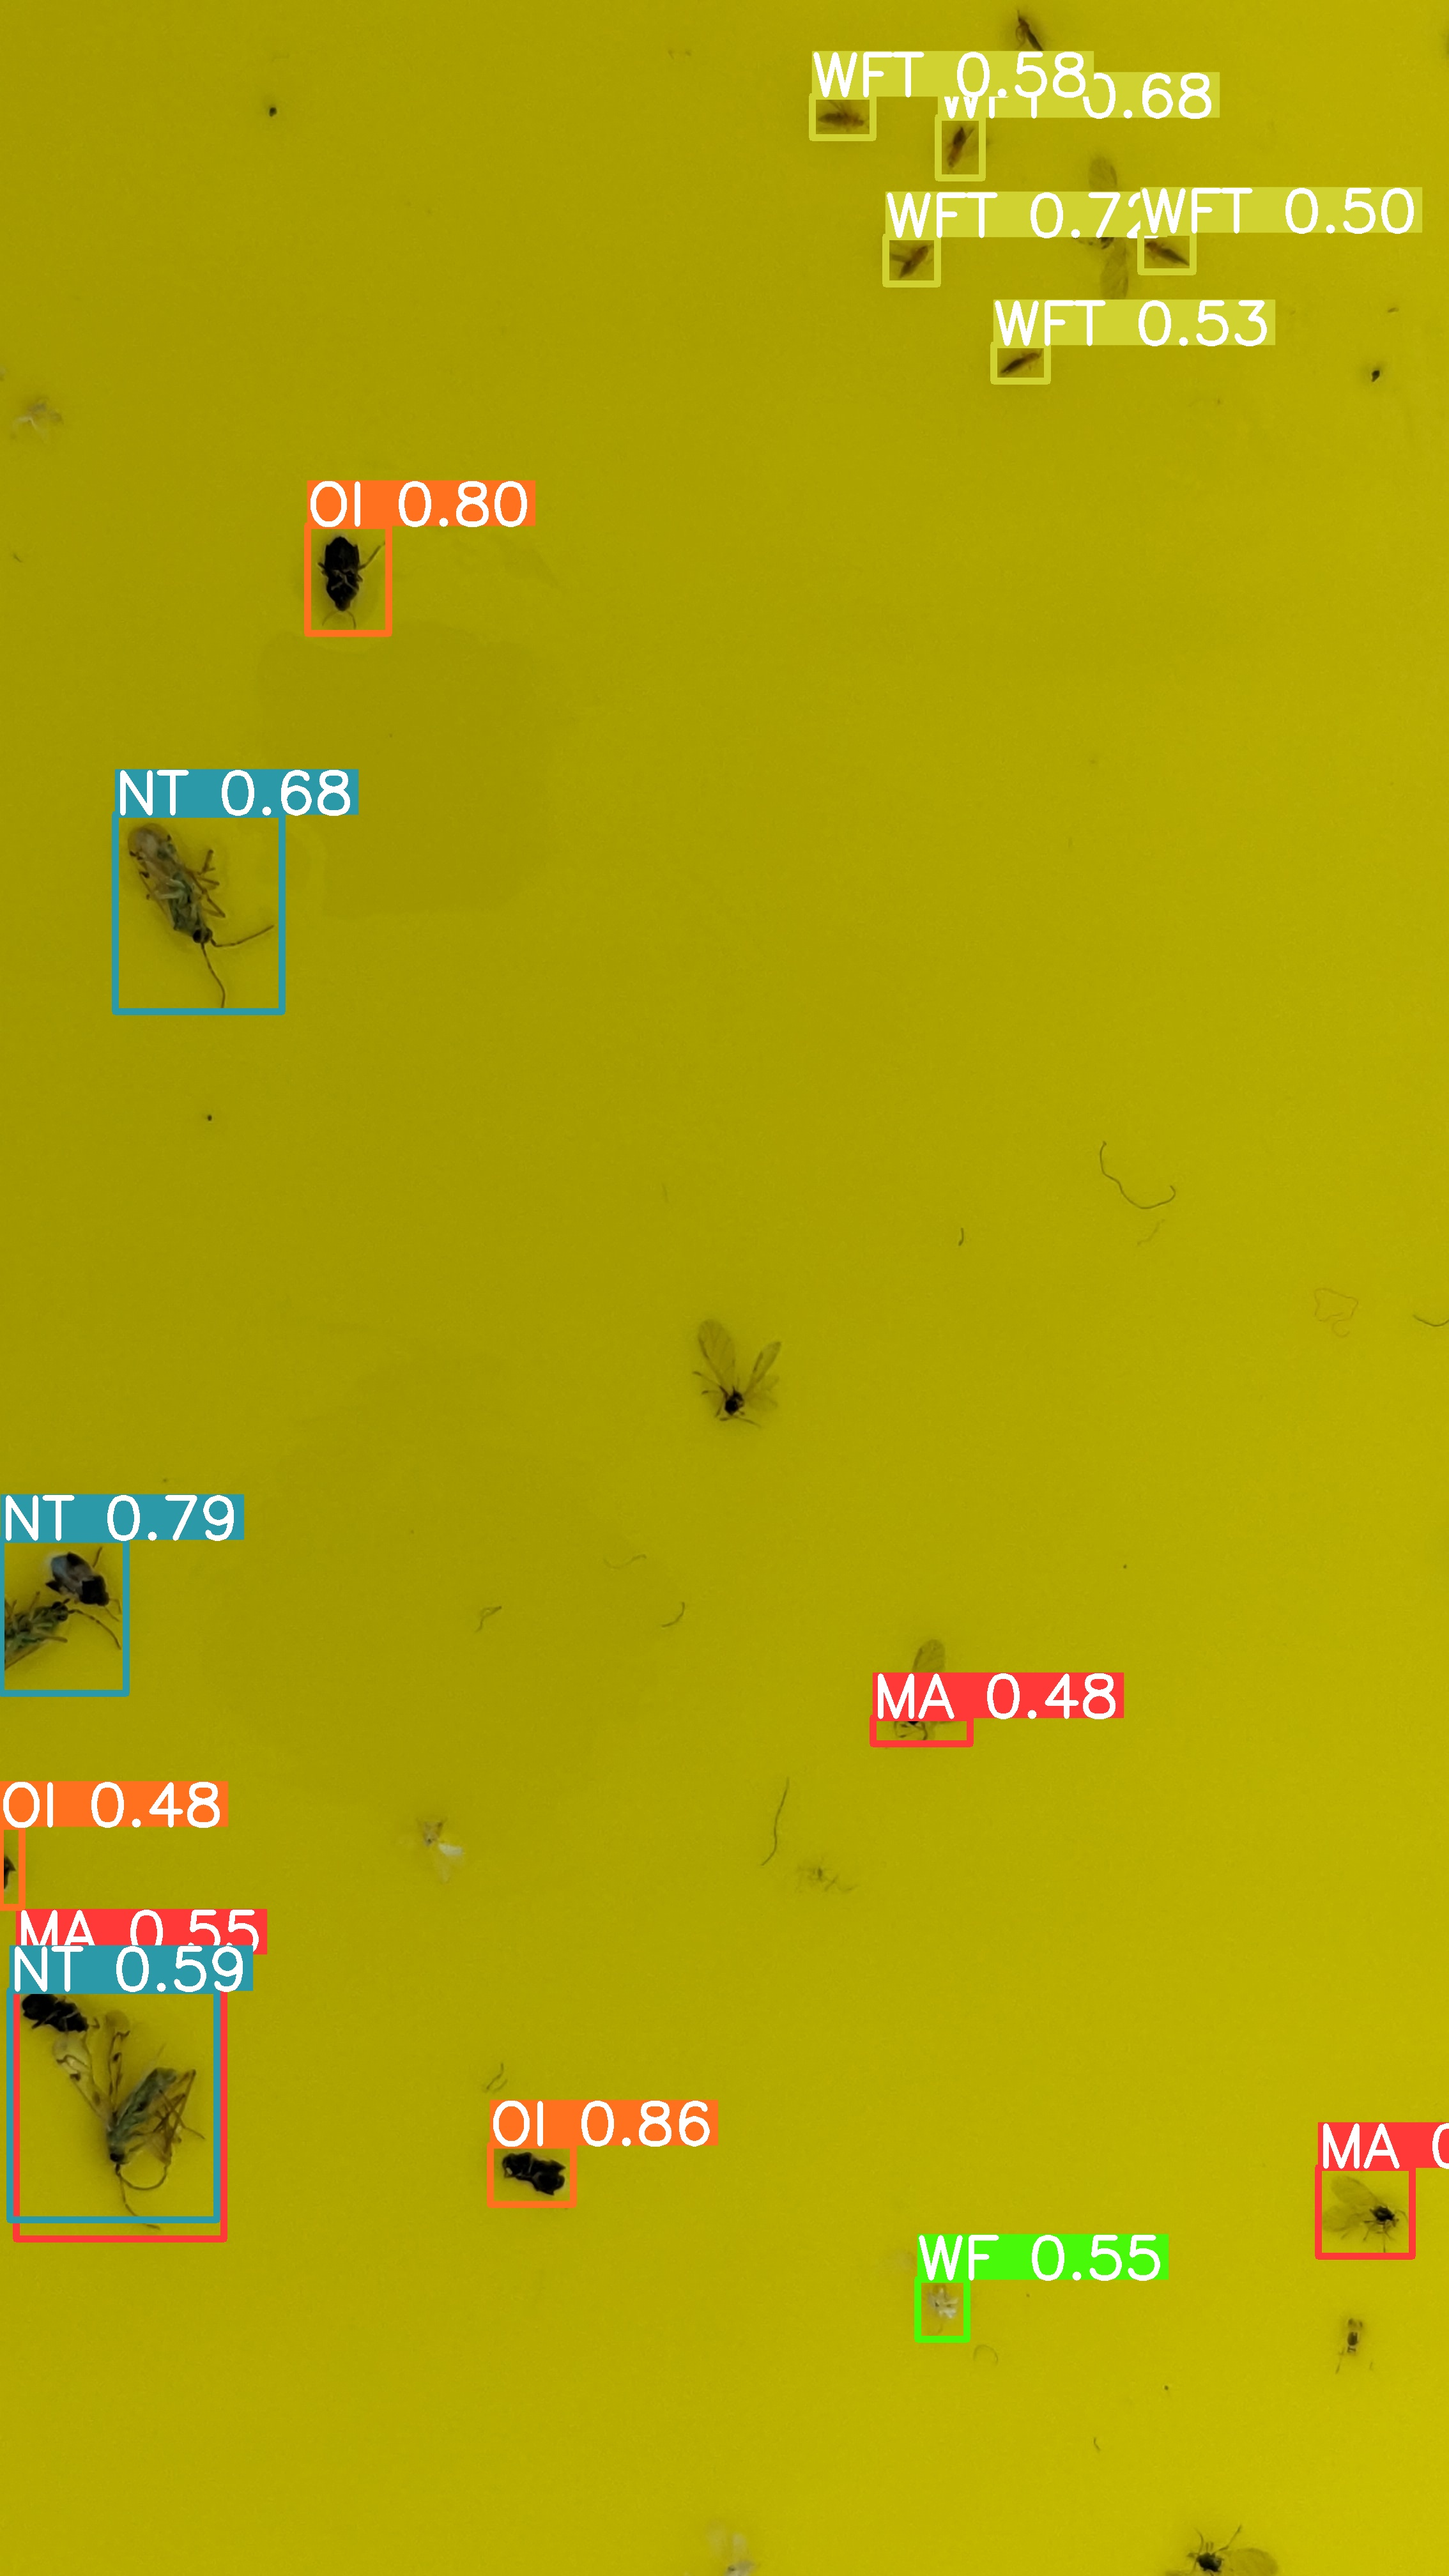

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Capstone_new/Data_New_Images_3/PXL_20240202_154817137.jpg',cv2.IMREAD_UNCHANGED)
img_converted = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
numpydata = asarray(img_converted)
visualize_object_predictions(
    numpydata,
    object_prediction_list=result.object_prediction_list,
    output_dir='/content/drive/MyDrive/Capstone_new',
    file_name='result_7020',
    export_format='jpeg'
)

Image('/content/drive/MyDrive/Capstone_new/result_7020.jpeg')